<a href="https://colab.research.google.com/github/KezhenLi/Homework6/blob/main/homework6_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import array, arange, sqrt
from pylab import plot, show, xlabel, ylabel

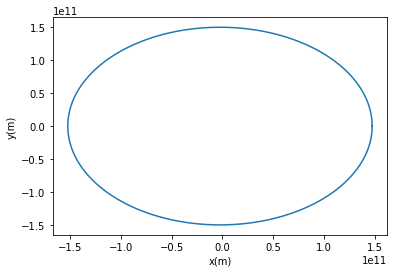

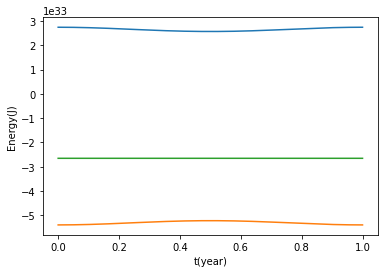

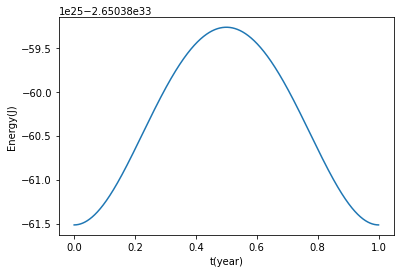

In [28]:
#(a)
x0 = 1.4710 * 10 ** 11
vx0 = 0
y0 = 0
vy0 = 3.0287 * 10 ** 4 * 8760 * 60 * 60  # m/year
t0 = 0
t1 = 1  # year
h = 1 / 8760  # year
G = 6.6738 * 10 ** -11 * ( 8760 * 60 * 60) ** 2
MSun = 1.9891 * 10 ** 30  

def f(r):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    return array([ vx, -G * MSun * x / sqrt(x ** 2 + y ** 2) ** 3, vy, -G * MSun * y / sqrt(x ** 2 + y ** 2) ** 3 ], float)

tpoints = arange(t0, t1, h)
xpoints = []
ypoints = []
r = array([x0, vx0, y0, vy0], float)
f_mid = 0.5 * h * f(r)
vx_mid = r[1] + f_mid[1]
vy_mid = r[3] + f_mid[3]
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    r[0] += h * vx_mid
    r[2] += h * vy_mid
    k = h * f(r)
    r[1] = vx_mid + 0.5 * k[1]
    r[3] = vy_mid + 0.5 * k[3]
    f_mid = 0.5 * h * f(r)
    vx_mid += k[1]
    vy_mid += k[3]

plot(xpoints, ypoints)
xlabel("x(m)")
ylabel("y(m)")
show()

#(b)
MEarth = 5.9722 * 10 ** 24  

tpoints = arange(t0, t1, h)
xpoints = []
ypoints = []
potential = []
kinetic = []
r = array([x0, vx0, y0, vy0], float)
f_mid = 0.5 * h * f(r)
vx_mid = r[1] + f_mid[1]
vy_mid = r[3] + f_mid[3]
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[2])
    potential.append(-6.6738 * 10 ** -11 * M * MEarth / sqrt(r[0] ** 2 + r[2] ** 2))
    kinetic.append(0.5 * MEarth * (r[1] ** 2 + r[3] ** 2) / (8760 * 60 * 60) ** 2)
    r[0] += h * vx_mid
    r[2] += h * vy_mid
    k = h * f(r)
    r[1] = vx_mid + 0.5 * k[1]
    r[3] = vy_mid + 0.5 * k[3]
    f_mid = 0.5 * h * f(r)
    vx_mid += k[1]
    vy_mid += k[3]

Etotal = array(kinetic, float) + array(potential, float)

plot(tpoints, kinetic)
plot(tpoints, potential)
plot(tpoints, Etotal)
xlabel("t(year)")
ylabel("Energy(J)")
show()

#(c)
plot(tpoints, Etotal)
xlabel("t(year)")
ylabel("Energy(J)")
show()